In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from src.data import MiniBooNEDataHandler
from src.visualization import NeutrinoPlotter, calculate_smart_limits
from src.config import SaveConfig

handler = MiniBooNEDataHandler()
plotter = NeutrinoPlotter()
save_config = SaveConfig(save_dir="../figures/plots")

## Import Dataset & Cleaning

In [2]:
df = handler.load()

📂 Loading data...
🔍 Validation: 36,499 signal vs expected 36,499
🔍 Validation: 93,565 background vs expected 93,565
✅ Total number of events corretly imported
✅ Loaded 130064 rows, 51 columns.
📊 Signal events: 36,499
📊 Background events: 93,565


In [3]:
df = handler.clean_data()

✅ There are no missing values
There are in total 466 duplicated values
✅ Dropped the duplicated values


In [4]:
df.iloc[:, :7].describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
count,129598.000000,129598.000000,129598.000000,129598.000000,129598.000000,129598.000000,129598.000000
mean,4.848449,1.476997,127.832571,0.267711,-0.006106,0.145377,0.954790
std,4.110993,4.023424,184.418149,3.926022,3.924514,3.927013,3.943212
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,4.020000,0.882000,50.000000,0.242000,0.001240,0.086300,0.718000
50%,4.790000,1.390000,106.000000,0.272000,0.005010,0.141000,0.924000
75%,5.630000,1.950000,139.000000,0.315000,0.013200,0.213000,1.180000
max,17.100000,8.800000,4750.000000,0.737000,0.179000,0.704000,6.240000


## EDA

Saved: ../figures/plots/correlation_barplot_12_features.png
Saved: ../figures/plots/correlation_barplot_12_features.pdf


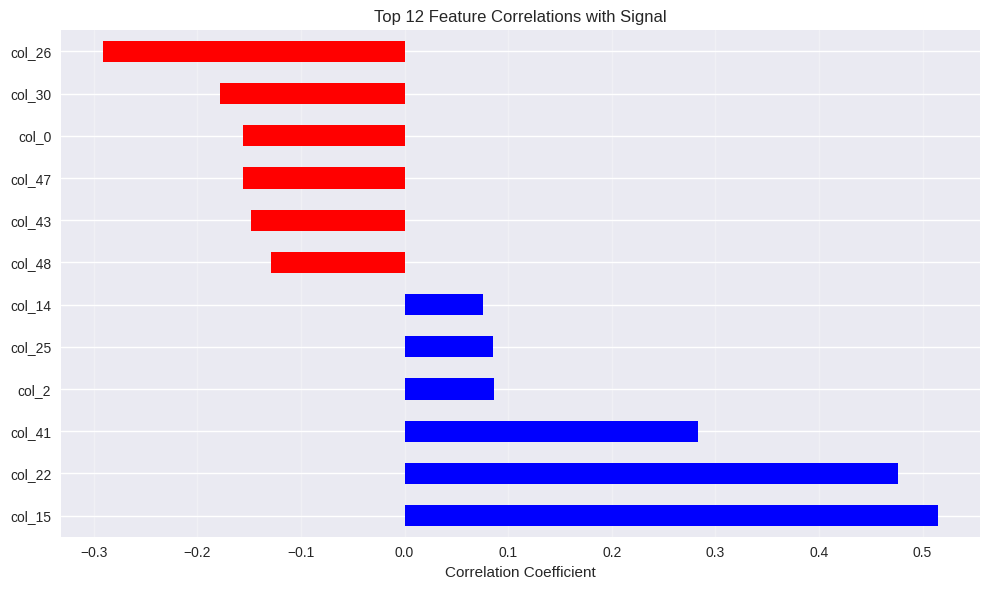

In [5]:
fig = plotter.create_correlation_barplot(df, num_features= 12, figsize=(10,6), save_config=save_config)

Saved: ../figures/plots/full_correlation_map.png
Saved: ../figures/plots/full_correlation_map.pdf


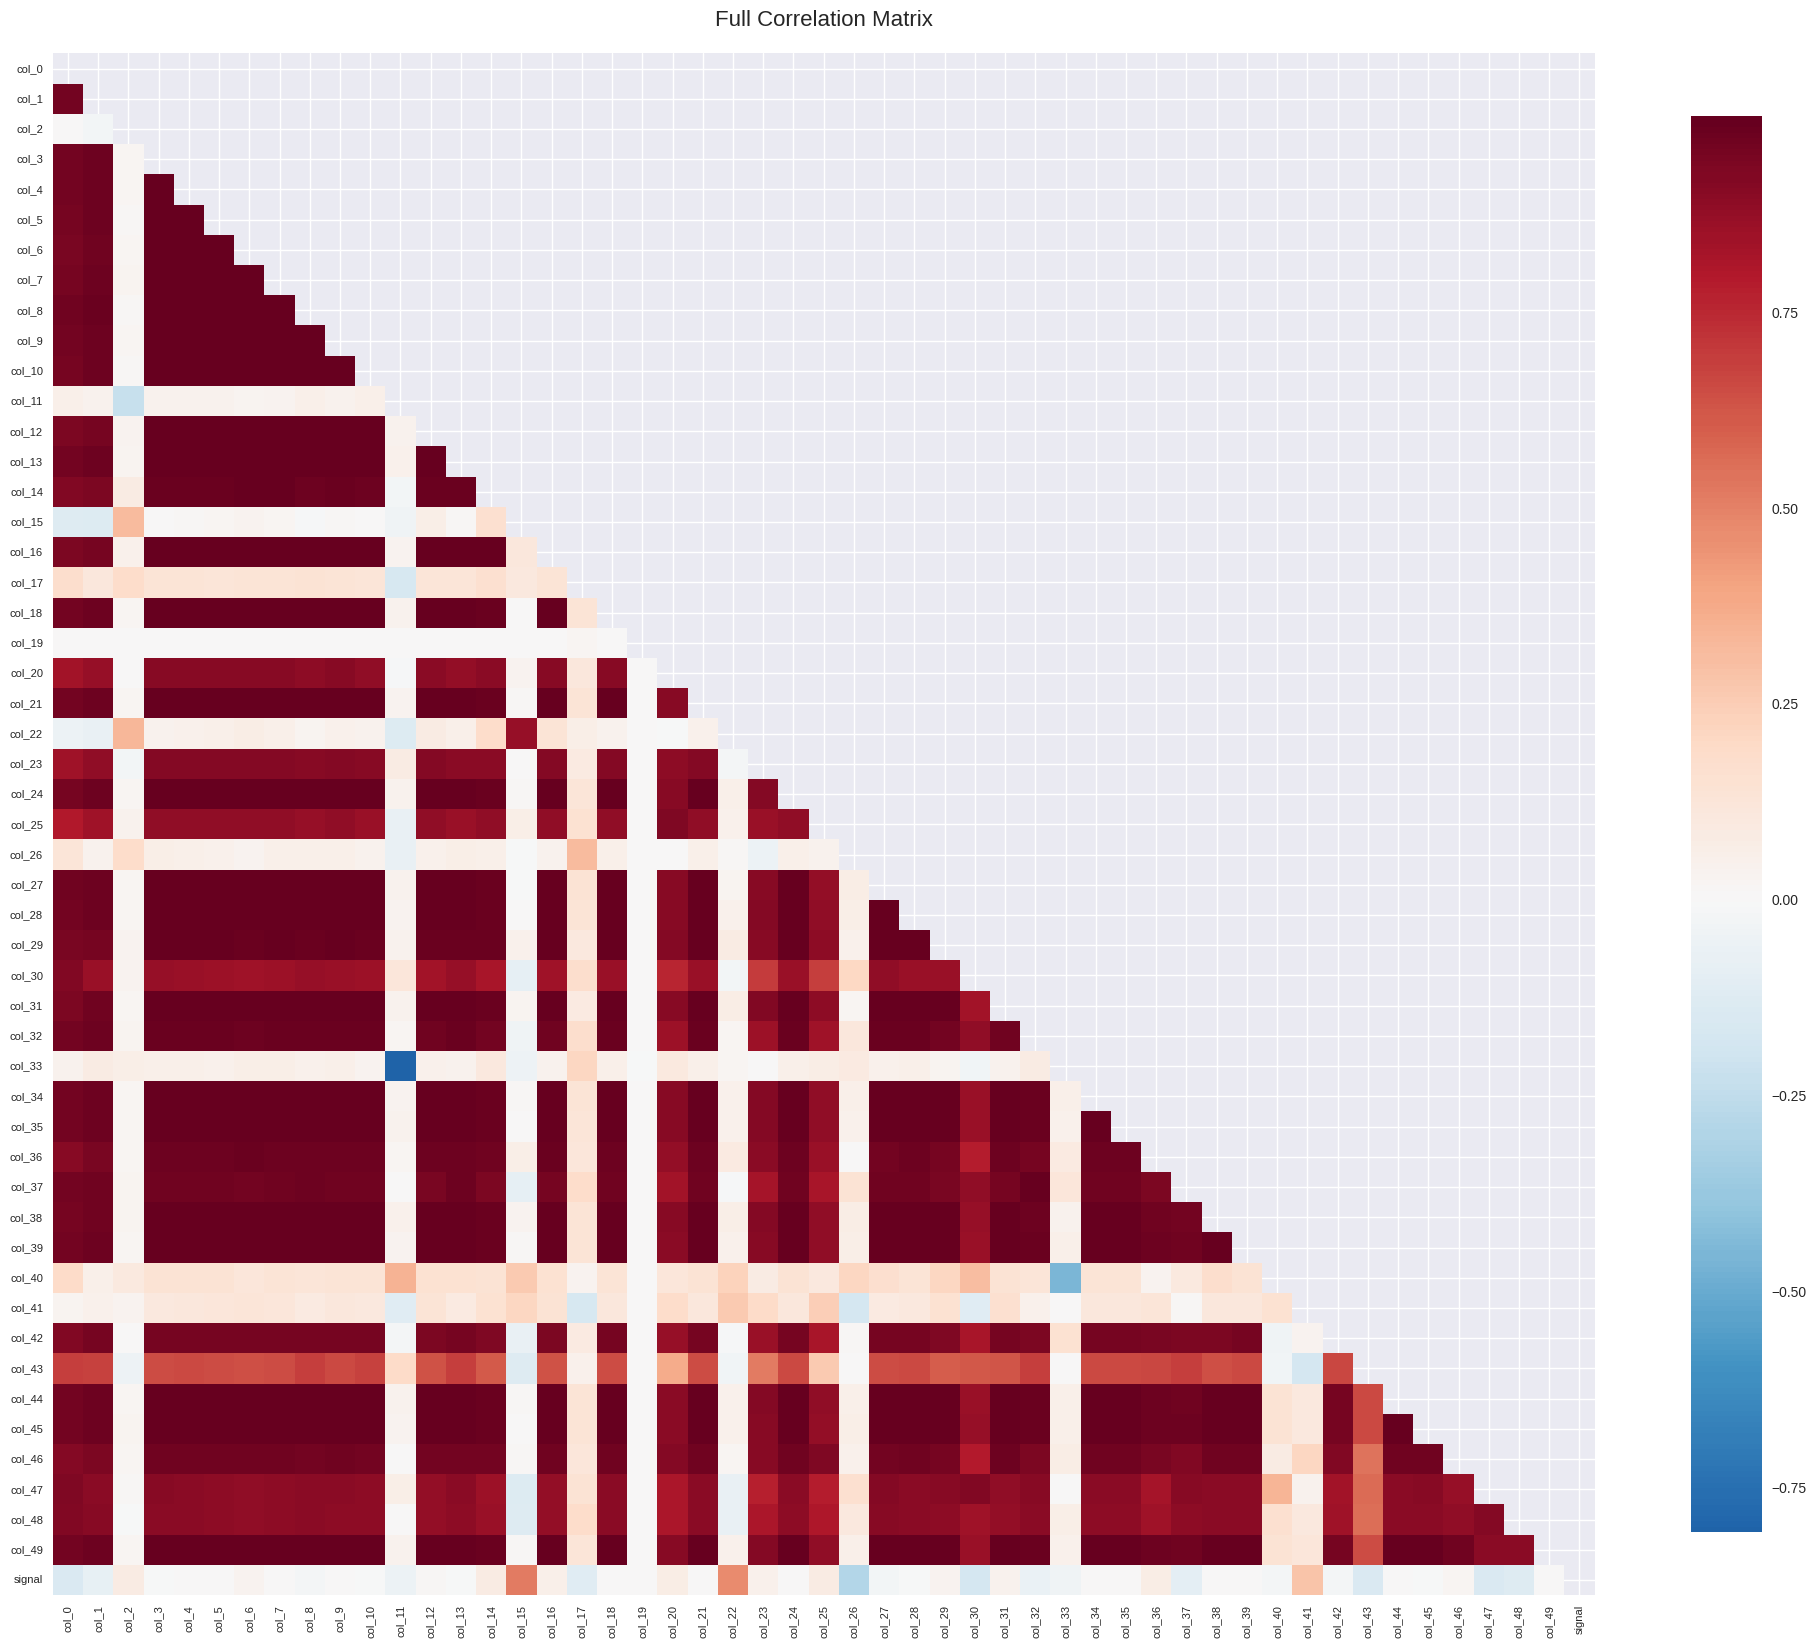

In [6]:
fig_cor = plotter.create_full_correlation_map(df, save_config=save_config)

Saved: ../figures/plots/top_10_correlation_map.png
Saved: ../figures/plots/top_10_correlation_map.pdf


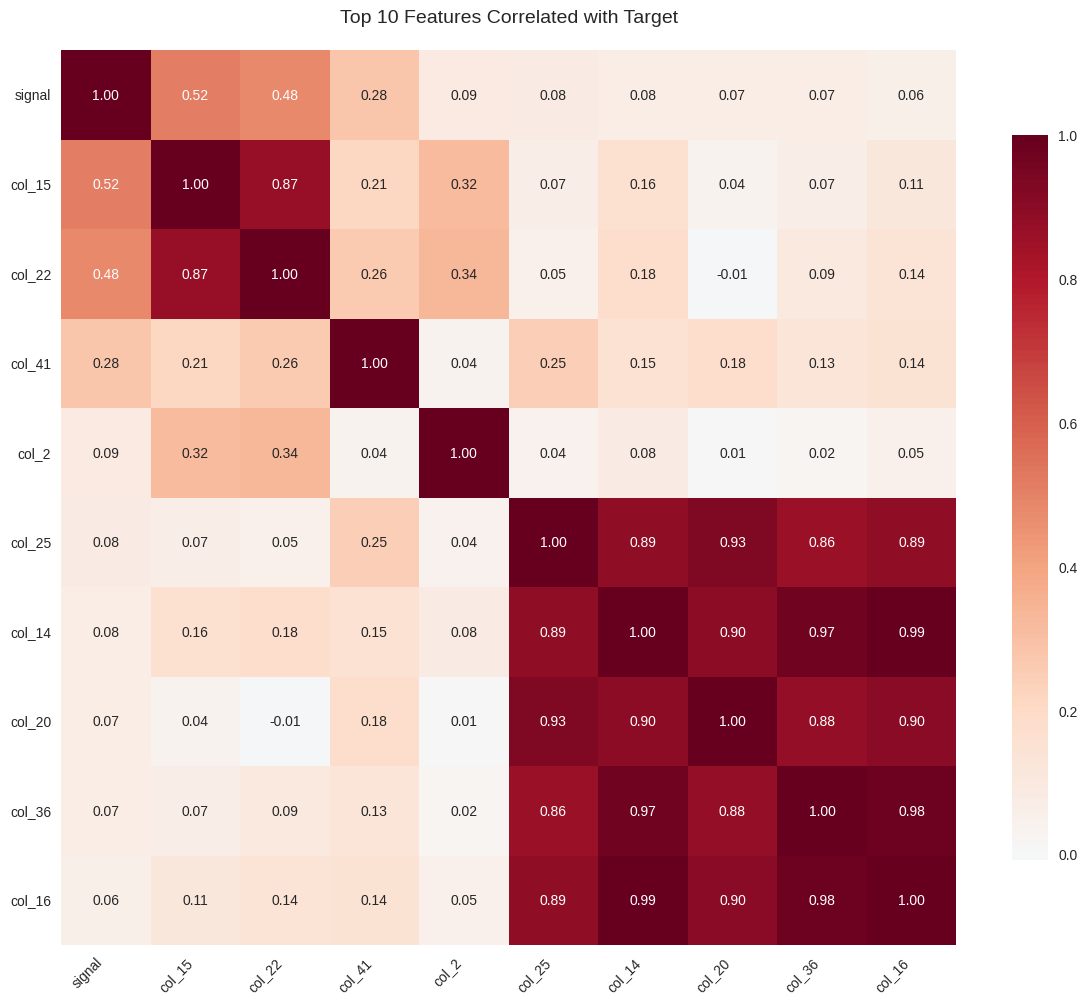

In [7]:
fig_top_corr = plotter.create_top_correlation_map(df, mask_upper=False, save_config=save_config)

Analyzing skewness for first 11 columns:
col_0                | Skewness:  -224.69 | N: 129,598
  -> Extreme skew! Using limits: [2.7200, 7.7500]
col_1                | Skewness:  -237.27 | N: 129,598
  -> Extreme skew! Using limits: [0.1990, 4.4900]
col_2                | Skewness:     8.32 | N: 129,598
col_3                | Skewness:  -254.47 | N: 129,598
  -> Extreme skew! Using limits: [0.1770, 0.4650]
col_4                | Skewness:  -254.55 | N: 129,598
  -> Extreme skew! Using limits: [-0.0019, 0.0558]
col_5                | Skewness:  -254.18 | N: 129,598
  -> Extreme skew! Using limits: [0.0000, 0.4980]
col_6                | Skewness:  -251.67 | N: 129,598
  -> Extreme skew! Using limits: [0.3810, 1.9100]
col_7                | Skewness:  -254.43 | N: 129,598
  -> Extreme skew! Using limits: [0.6160, 0.9380]
col_8                | Skewness:  -252.91 | N: 129,598
  -> Extreme skew! Using limits: [2.9300, 4.2100]

Total features with extreme skewness: 8
Feature limits diction

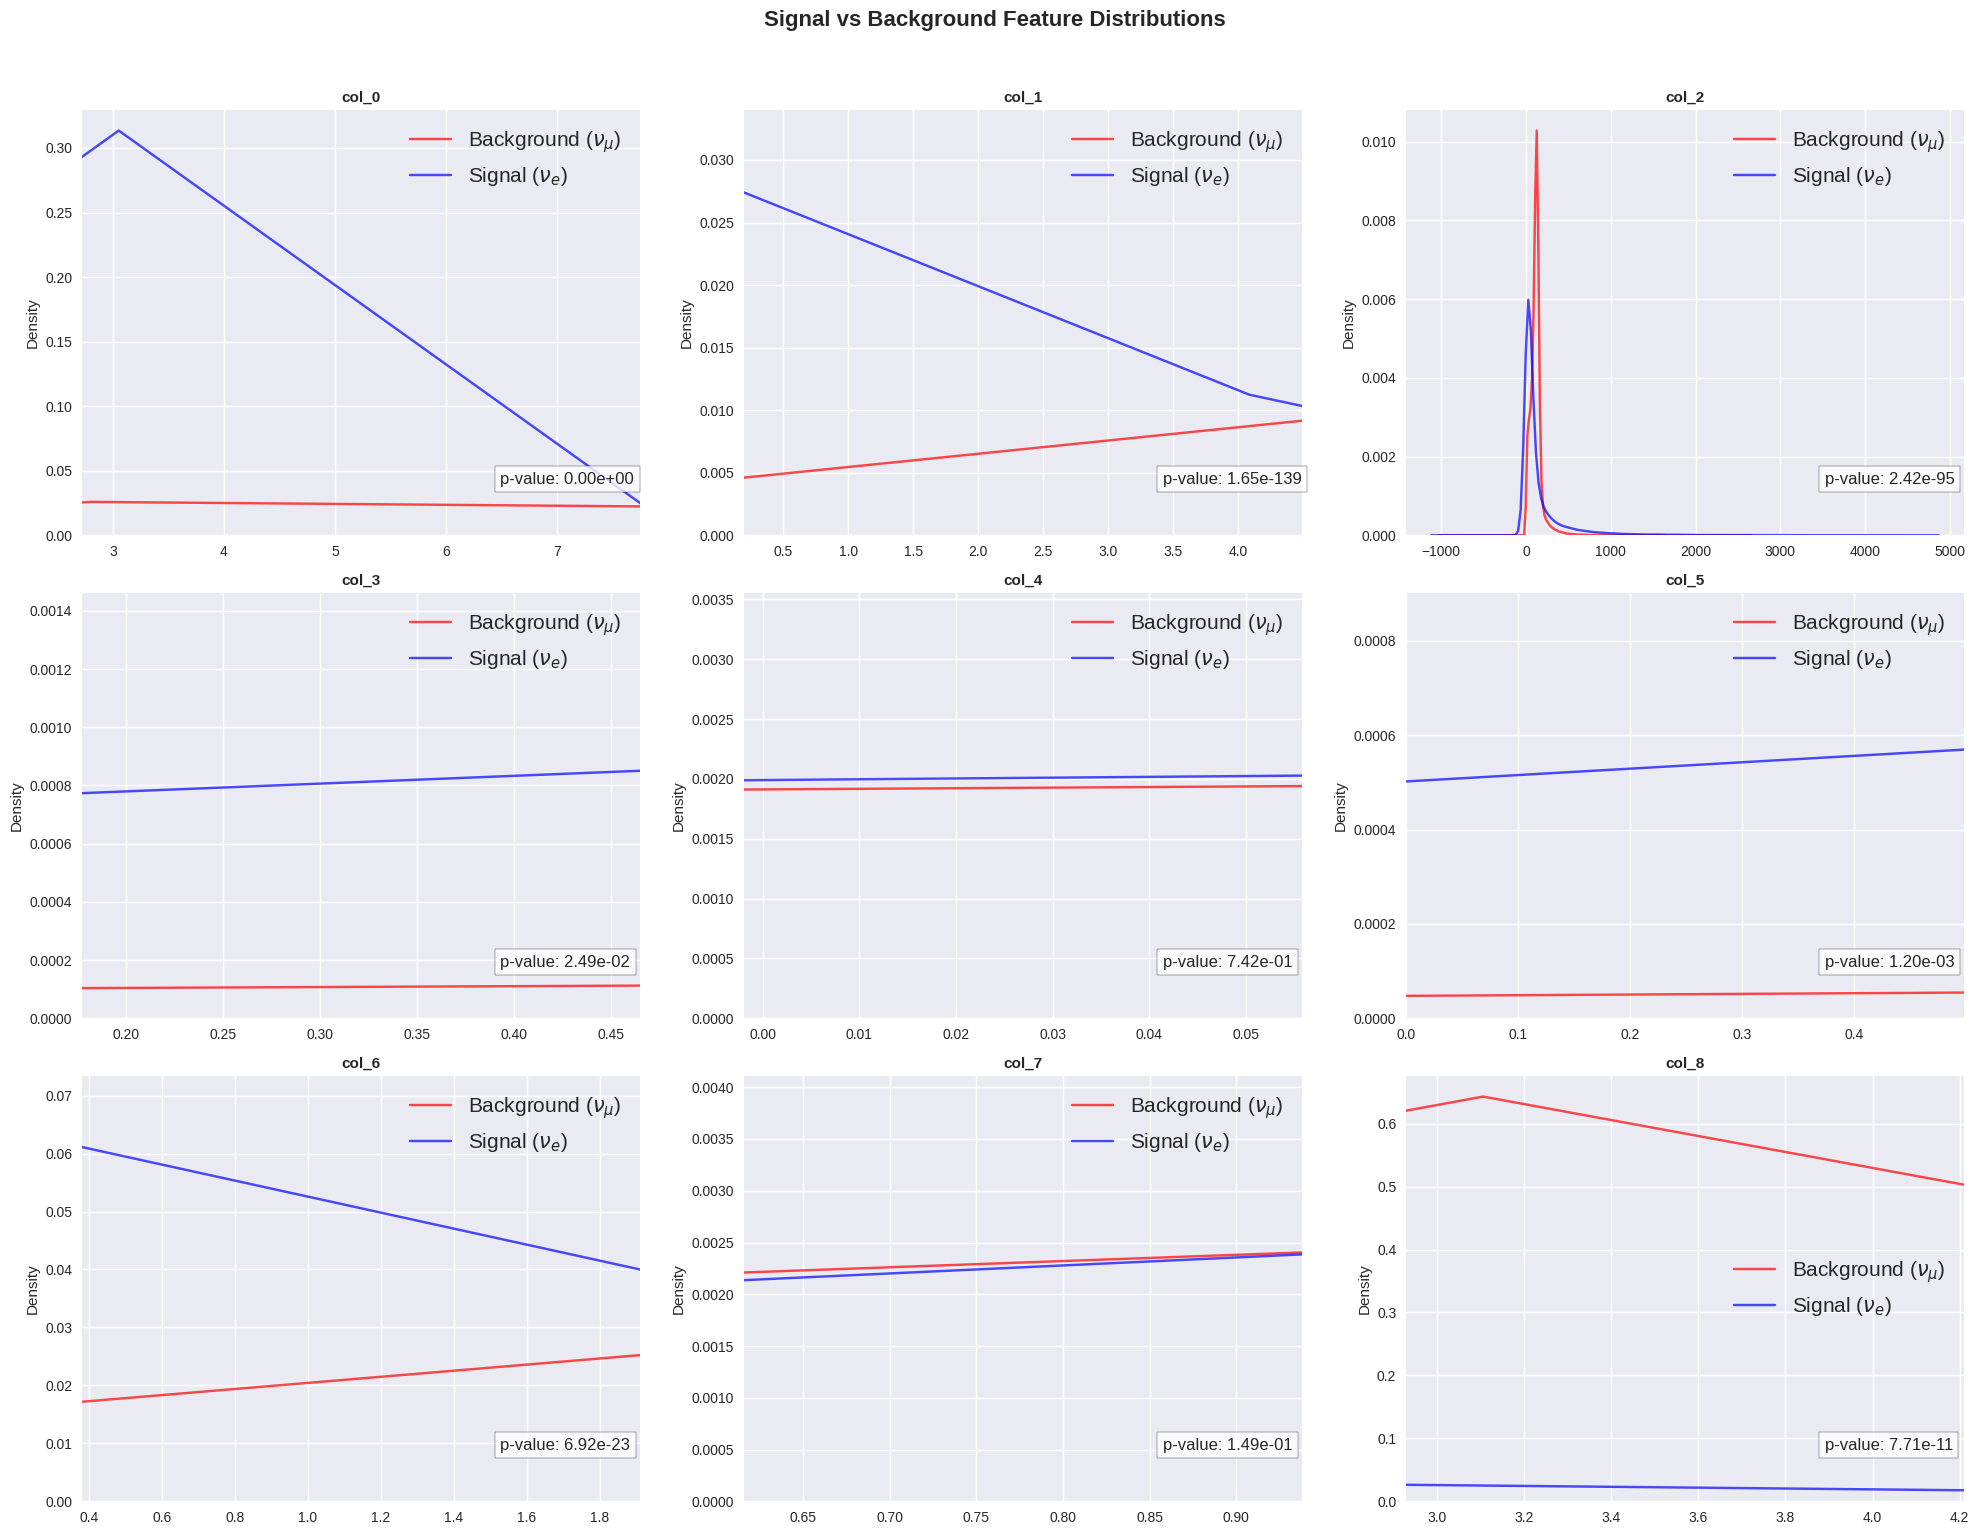

In [8]:
# Your code with improvements
feature_limits = {}
test_cols = df.columns[:9]  # First 11 columns including potential 'signal'
test_df = df[test_cols]

# Ensure 'signal' column is included for the plotting function
if 'signal' not in test_cols:
    test_cols = list(test_cols) + ['signal']
    test_df = df[test_cols]

print("Analyzing skewness for first 11 columns:")
print("=" * 50)

for col in test_cols:
    if col != 'signal':
        data = test_df[col].dropna()
        skew_val = data.skew()
        
        print(f"{col:20} | Skewness: {skew_val:8.2f} | N: {len(data):6,}")
        
        if abs(skew_val) > 10:  # Extremely skewed
            # Use 1st-99th percentiles to exclude extreme outliers
            lower = np.percentile(data, 1)
            upper = np.percentile(data, 99)
            feature_limits[col] = (lower, upper)
            print(f"  -> Extreme skew! Using limits: [{lower:.4f}, {upper:.4f}]")

print(f"\nTotal features with extreme skewness: {len(feature_limits)}")
print("Feature limits dictionary:", feature_limits)


# Create the plot
fig = plotter.create_signal_vs_background_distributions(
    df=test_df,
    feature_limits=feature_limits,
    save_config=save_config,
    n_cols=3
)

Saved: ../figures/plots/top_4_feature_pairplot.png
Saved: ../figures/plots/top_4_feature_pairplot.pdf


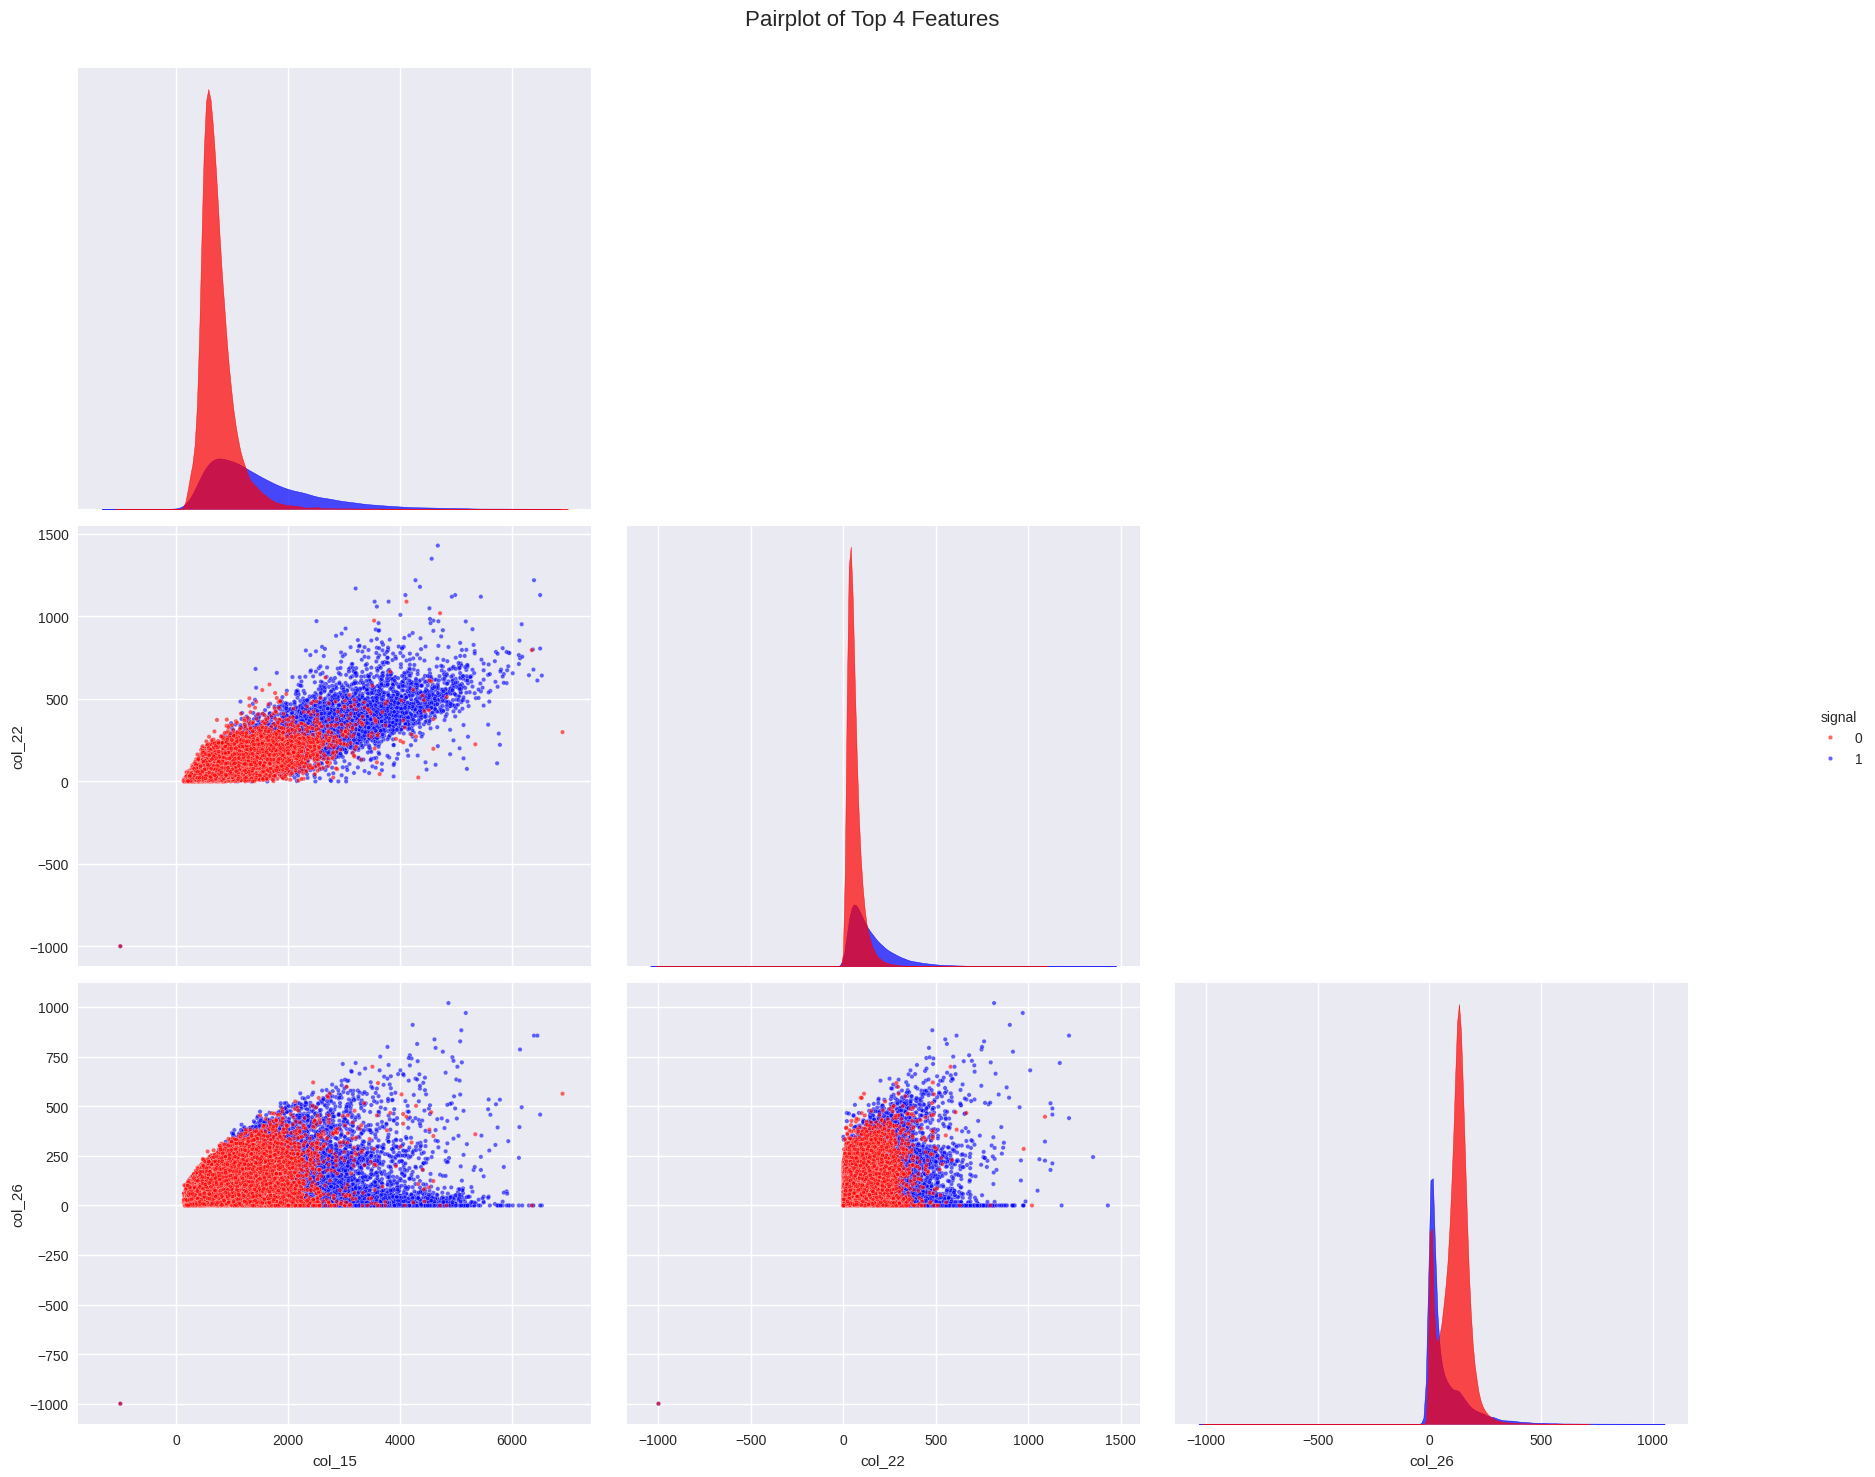

In [9]:
fig_pair = plotter.create_top_feature_pairplot(df, num_features=4, save_config=save_config)

<string>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


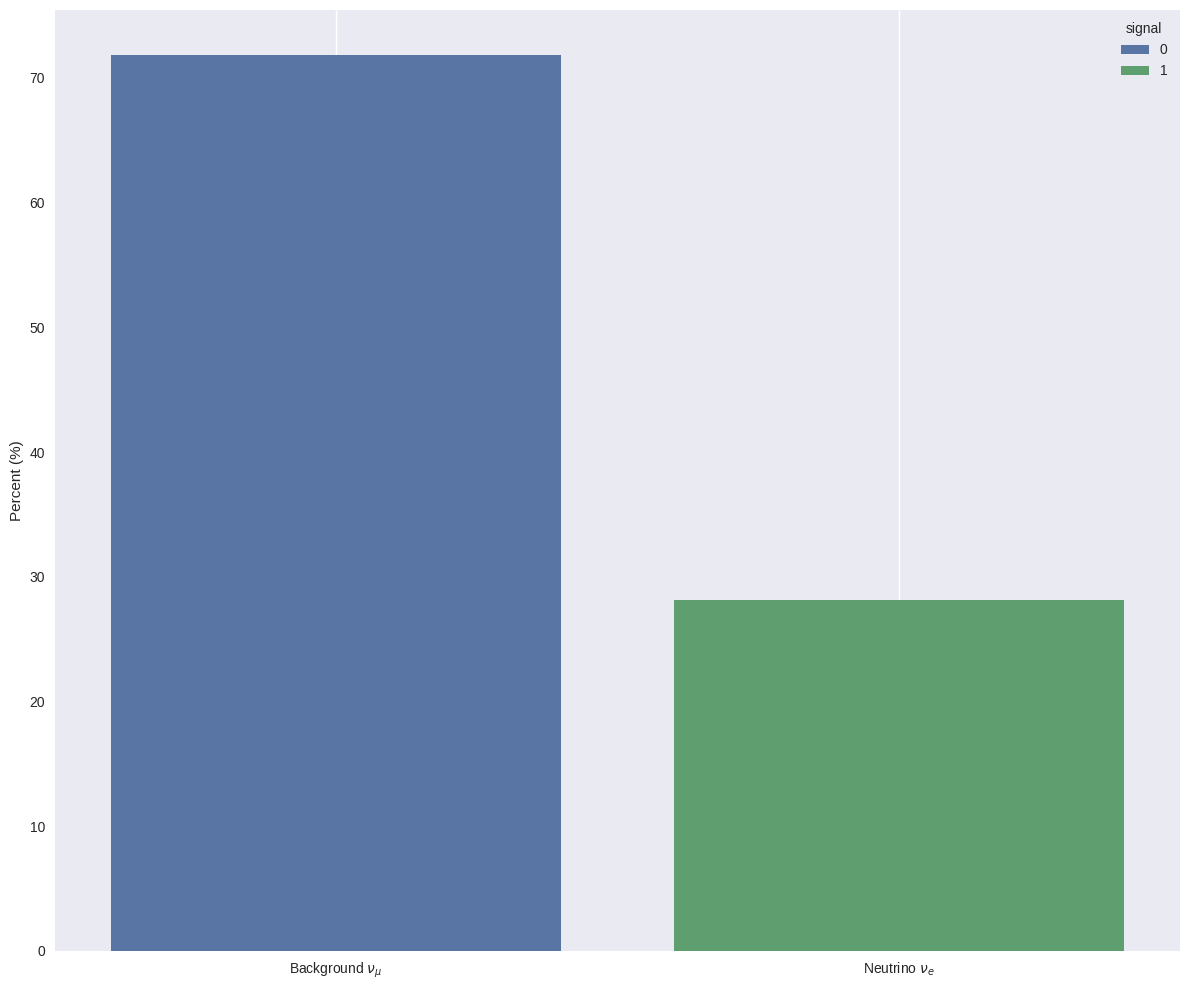

In [13]:
fig = plotter.create_target_plot(df, stat="percent")